<center><h1>Лабораторна робота №6</h1><h2>Застосування numpy</h2><h3>Роботу виконав студент групи ФБ-24 Синеуцький Олександр</h3></center>

<h4>Завдання 1:</h4>
<h4>1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.</h4>

In [9]:
import numpy as np

k = 3
b = 5

num_points = 100
x = np.random.uniform(0, 10, num_points)

y = k * x + b

noise = np.random.normal(0, 2, num_points)
y += noise

<h4>2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k` та b`.</h4>

In [10]:
def least_squares_fit(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    k_prime = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b_prime = y_mean - k_prime * x_mean

    return k_prime, b_prime

<h4>3. Порівняйте знайдені параметри з оцінкою np.polyfit(x, y, 1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).</h4>

In [11]:
k_prime, b_prime = least_squares_fit(x, y)

k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print("Оптимальні оцінки k' та b' (власна функція):", k_prime, b_prime)
print("Оптимальні оцінки k' та b' (np.polyfit):", k_polyfit, b_polyfit)
print("Початкові параметри прямої (k, b):", k, b)

Оптимальні оцінки k' та b' (власна функція): 3.0109308559672154 5.117947070466412
Оптимальні оцінки k' та b' (np.polyfit): 3.010930855967216 5.117947070466402
Початкові параметри прямої (k, b): 3 5


<h4>4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.</h4>

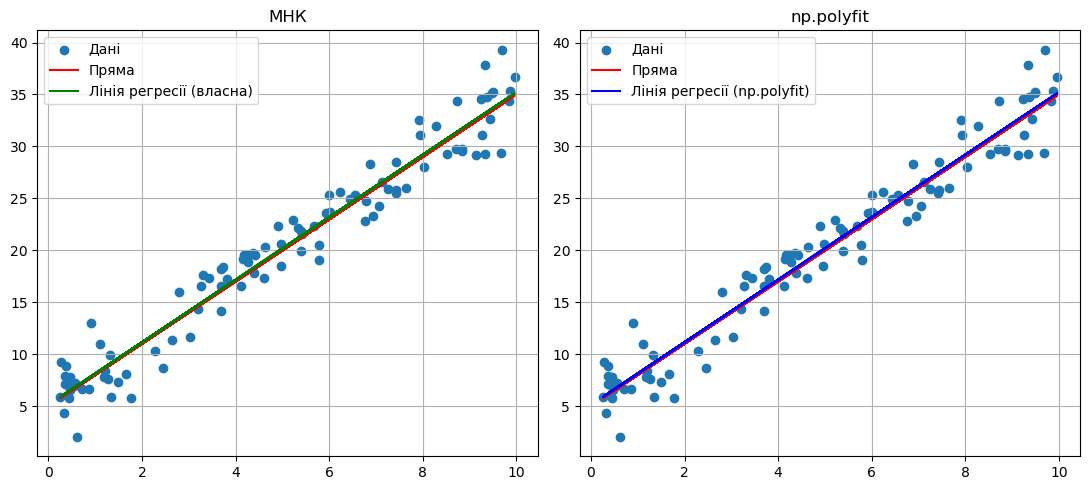

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=[11, 5])

plt.subplot(121)
plt.scatter(x, y, label='Дані')
plt.plot(x, k*x + b, color='red', label='Пряма')
plt.plot(x, k_prime*x + b_prime, color='green', label='Лінія регресії (власна)')
plt.title('МНК')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.scatter(x, y, label='Дані')
plt.plot(x, k*x + b, color='red', label='Пряма')
plt.plot(x, k_polyfit*x + b_polyfit, color='blue', label='Лінія регресії (np.polyfit)')
plt.title('np.polyfit')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<h4>Завдання 2:</h4>
<h4>1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k` та b`. Визначіть оптимальні вхідні параметри: learning_rate, n_iter</h4>

In [13]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k_prime = np.random.randn()
    b_prime = np.random.randn()

    errors = []

    for _ in range(n_iter):
        y_pred = k_prime * x + b_prime
        
        error = y_pred - y
        errors.append(np.mean(error**2))

        grad_k = np.mean(error * x)
        grad_b = np.mean(error)

        k_prime -= learning_rate * grad_k
        b_prime -= learning_rate * grad_b

    return k_prime, b_prime, errors

<h4>2. Додайте отриману лінію регресії на загальний графік</h4>

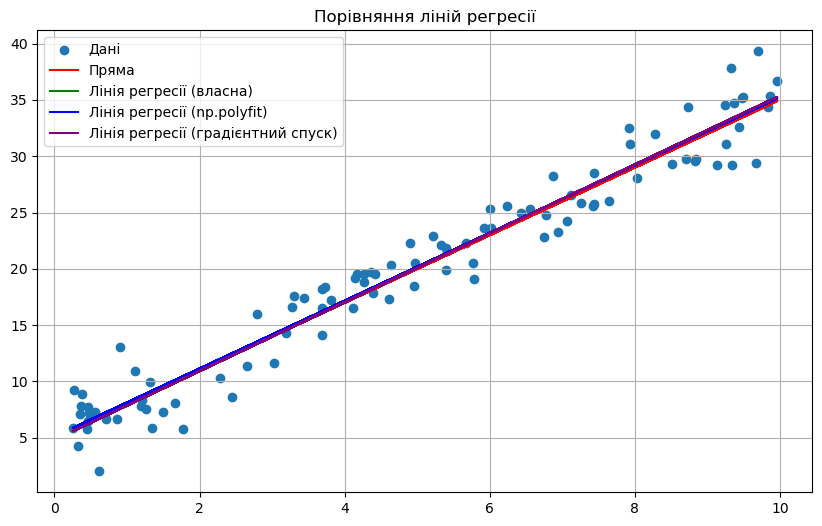

In [14]:
k_prime, b_prime, errors = gradient_descent(x, y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')

plt.plot(x, k*x + b, color='red', label='Пряма')
plt.plot(x, k_prime*x + b_prime, color='green', label='Лінія регресії (власна)')
plt.plot(x, k_polyfit*x + b_polyfit, color='blue', label='Лінія регресії (np.polyfit)')
plt.plot(x, k_prime*x + b_prime, color='purple', label='Лінія регресії (градієнтний спуск)')

plt.title('Порівняння ліній регресії')
plt.legend()
plt.grid(True)
plt.show()


<h4>3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки</h4>

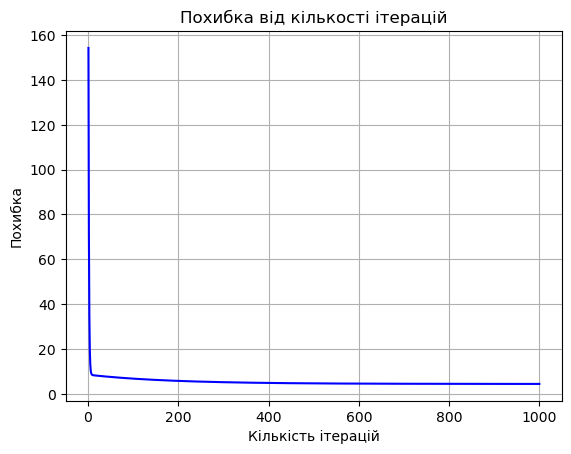

In [15]:
learning_rate = 0.01
n_iter = 1000

k_prime, b_prime, errors = gradient_descent(x, y, learning_rate, n_iter)

plt.plot(range(1, n_iter + 1), errors, color='blue')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Похибка від кількості ітерацій')
plt.grid(True)
plt.show()


<h4>4. Порівняйте отримані результати з результатами попереднього завдання</h4>

In [16]:
k_prime_ls, b_prime_ls = least_squares_fit(x, y)
k_polyfit, b_polyfit = np.polyfit(x, y, 1)
k_prime_gd, b_prime_gd, errors = gradient_descent(x, y)

print("МНК (k', b'):", k_prime_ls, b_prime_ls)
print("np.polyfit() (k', b'):", k_polyfit, b_polyfit)
print("Градієнтний спуск (k', b'):", k_prime_gd, b_prime_gd)

МНК (k', b'): 3.0109308559672154 5.117947070466412
np.polyfit() (k', b'): 3.010930855967216 5.117947070466402
Градієнтний спуск (k', b'): 3.0472491335152703 4.871066669315569
